# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## Finds out the distribution on the set 
**QQ Normal Plots**

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


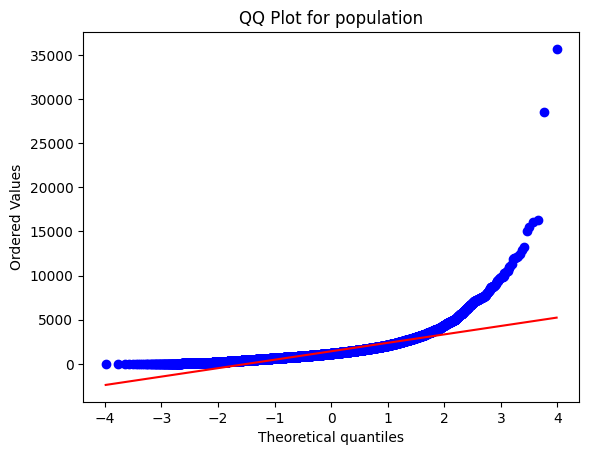

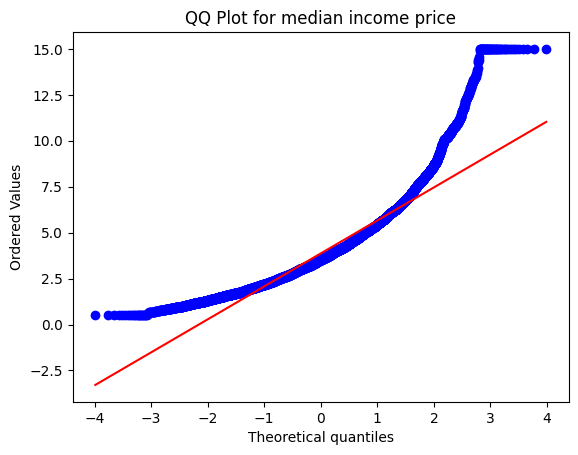

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Upload an Excel file
df = pd.read_csv('./data/housing.csv')
print(df.head())
# 'population'
data_p = df['population']
# plot
stats.probplot(data_p, dist="norm", plot=plt)
plt.title("QQ Plot for population")
plt.show()

# 'income'
data_i = df['median_income']
# plot
stats.probplot(data_i, dist="norm", plot=plt)
plt.title("QQ Plot for median income price")
plt.show()


**histograms**

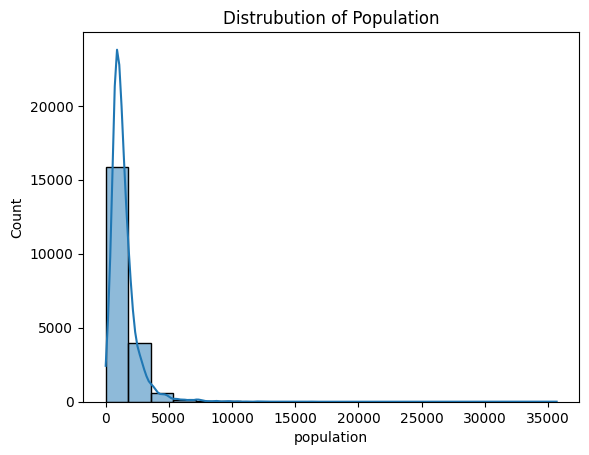

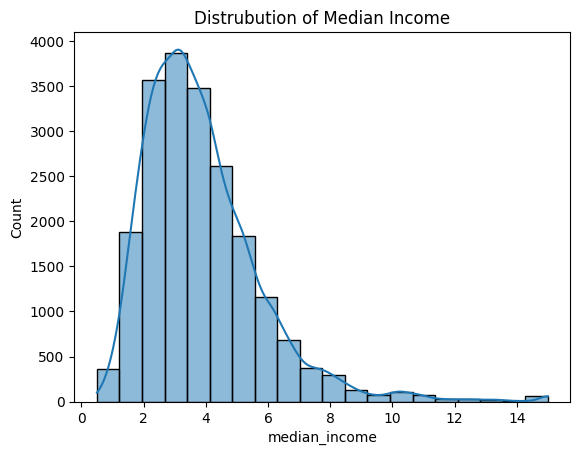

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('data/housing.csv')

#seaborn
sns.histplot(data=df, x='population', bins=20, kde=True)  # kde=True 
plt.title('Distrubution of Population')
plt.show()

# histograms
sns.histplot(data=df, x='median_income', bins=20, kde=True)
plt.title('Distrubution of Median Income')
plt.show()

 **box plots**

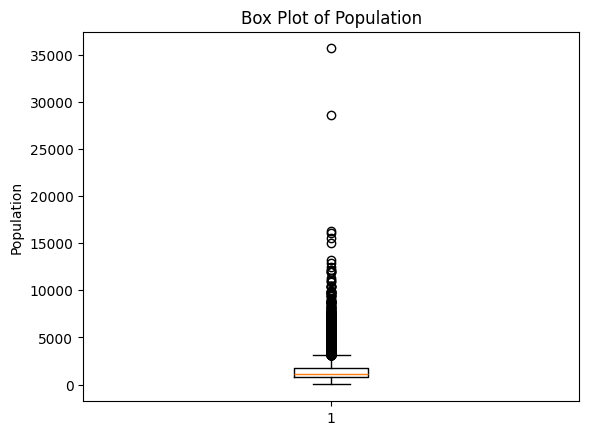

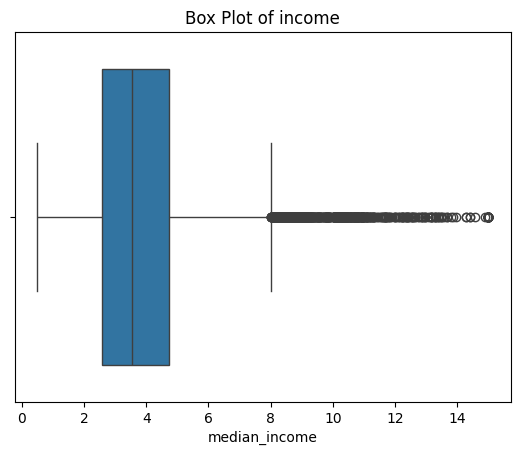

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('data/housing.csv')

# population
plt.boxplot(df['population'])
plt.ylabel('Population')
plt.title('Box Plot of Population')
plt.show()

# income
sns.boxplot(x=df['median_income'])
plt.title('Box Plot of income')
plt.show()



## z-score

In [28]:
import numpy as np

df = pd.read_csv('data/housing.csv')
population = df["population"]  # population

#mean
mean = np.mean(population)
print("Mean: ",mean)

#standard devation
std_dev = np.std(population)
print("standard devation:",std_dev)


# value = 1000
z_scores = (1000 - mean) / std_dev
print(z_scores)

Mean:  1425.4767441860465
standard devation: 1132.434687757615
-0.37571857236954853


**Summary**

A z-score of -0.3757 indicates that the data point 1000 you are evaluating is 0.3757 standard deviations below the mean 1425 of the dataset. This suggests that the value is slightly lower than the average.

This means that the value is not an outlier or unusual.

**T-score**

In [29]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/housing.csv')

#Get random_population 30 records
random_population_sample = df['population'].sample(n=30, replace=True) 
#print(random_population_sample)

#mean
mean = np.mean(random_population_sample)
print("Mean: ",mean)

#standard devation
std_dev = np.std(random_population_sample)
print("standard devation:",std_dev)

n = len(random_population_sample)

print("Size: ", n)

# value = 1000
value = 1000

# Calcular el t-score
t_score = (value - mean) / (std_dev / np.sqrt(n))
print("value: ", value)
print("t_score:" ,t_score)

Mean:  1410.4666666666667
standard devation: 915.2830794653397
Size:  30
value:  1000
t_score: -2.45630950119406


**Summary**

The t-score of -53.98 indicates that the value 1000 is 2.46 standard deviations below the sample mean, which is 1425.48. the value 1000 is exceptionally far away from the mean

Such an extreme t-score is a clear sign that 1000 does not behave like the other values in the sample and could be an outlier.

## Shapiro-Wilk Normality Test

In [30]:
import scipy.stats as stats

population = df["population"]

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(population)
print("Shapiro-Wilk test for population:")
print("Shapiro-Wilk Statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk test for population:
Shapiro-Wilk Statistic: 0.7133165954100374
P-value: 1.7444774799024147e-102


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


**Summary**

The Shapiro-Wilk test was conducted to assess the normality of the "population" data. The test yielded a p-value of 1.74 x 10^-102, which is significantly less than the conventional alpha level of 0.05. This extremely small p-value provides strong evidence against the null hypothesis that the data is normally distributed. In other words, we can confidently reject the assumption of normality for this dataset. The highly significant result suggests that the data is likely skewed or has heavy tails, implying that parametric statistical tests assuming normality may not be appropriate. It is recommended to consider non-parametric tests or data transformations to address the non-normality.